In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage.filters import gaussian_filter
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u

from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
import glob 
import os

In [ ]:
#                 ****************** UV-Optical ******************

In [2]:
dirname = '/Users/orion/phd_research/hst/cropped_drc/'
list_hdus =  [fits.open(filenames)[0] for filenames in glob.glob(os.path.join(dirname, '1025+390_*_new.fits'))]
print (list_hdus)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa02c790b90>, <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa02c7defd0>]


In [3]:
wcs_out, shape_out = find_optimal_celestial_wcs(list_hdus)
                                                
wcs_out.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =     -691.39430257878 / Pixel coordinate of reference point            
CRPIX2  =      2366.0398766486 / Pixel coordinate of reference point            
CDELT1  = -1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =       157.1988839391 / [deg] Coordinate value at reference point      
CRVAL2  =      38.765789943134 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =      38.7657899431

In [4]:
shape_out

(687, 625)

In [5]:
filename = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f336w_new.fits')
filename2 = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f763m_new.fits')


hdu_336 = fits.open(filename)[0]
hdu_763 = fits.open(filename2)[0]

In [6]:
registered_336, registered_336_footprint = reproject_interp(hdu_336, wcs_out, shape_out)
registered_763, registered_763_footprint = reproject_interp(hdu_763, wcs_out, shape_out)

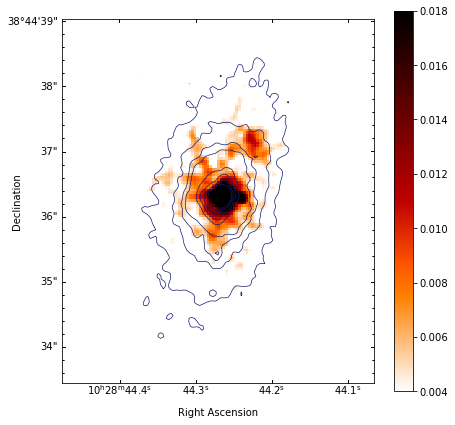

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection=wcs_out)

registered_336 = gaussian_filter(registered_336, 1.0)
im = ax.imshow(registered_336, vmin=0.004, vmax=0.018, origin='lower', cmap= 'gist_heat_r', interpolation='none') 

registered_763 = gaussian_filter(registered_763, 1.0)
ax.contour(registered_763, transform=ax.get_transform(wcs_out),levels=[0.02,0.035,0.05,0.06,0.11,0.14,0.17,0.2],
                                                        colors='midnightblue', alpha=1.0, linewidths=0.7)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right Ascension',minpad=1.6)
lat.set_axislabel('Declination',minpad=-1.0)
ax.set_xlim(260, 380)
ax.set_ylim(280, 420)
ax.tick_params(axis='both',direction='in') 
lon.set_ticks(number=5)
lat.set_ticks(number=7)
lat.display_minor_ticks(True)

fig.colorbar(im, ax=ax)
plt.savefig('1025+390_new.png', facecolor='w', dpi=300)

In [ ]:
#                 ****************** UV-Radio ******************

In [45]:
filename = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f336w_new.fits')
filename3 = get_pkg_data_filename('/Users/orion/phd_research/radio/1025+390_5GHz.fits')

hdu_336 = fits.open(filename)
hdu_5ghz = fits.open(filename3)

hdu_336.info()
hdu_5ghz.info()

Filename: /Users/orion/phd_research/hst/cropped_drc/1025+390_f336w_new.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     537   (563, 459)   float32   
Filename: /Users/orion/phd_research/radio/1025+390_5GHz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      83   (1031, 1041, 1, 1)   float32   


In [35]:
wcs_radio = WCS(hdu_5ghz[0].header)
wcs_radio

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 157.184484647  38.7435179987  4860099999.94  1.0  
CRPIX : 515.0  516.0  1.0  1.0  
NAXIS : 1031  1041  1  1

In [36]:
wcs_temp1 = wcs_radio.dropaxis(3)    
wcs_final = wcs_temp1.dropaxis(2)
wcs_final

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 157.184484647  38.7435179987  
CRPIX : 515.0  516.0  
NAXIS : 1031  1041

In [ ]:
newradioheader = wcs_final.to_header()
newradioheader

In [55]:
newradioHDU = fits.PrimaryHDU(data=hdu_5ghz[0].data, header=newradioheader)
newradioHDU.writeto('5GHz_dropaxis.fits',overwrite=True)

new_radio = fits.open('5GHz_dropaxis.fits')
h = new_radio[0].header

wcs_new = WCS(new_radio[0].header)
wcs_new.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                515.0 / Pixel coordinate of reference point            
CRPIX2  =                516.0 / Pixel coordinate of reference point            
CDELT1  =     -2.422399484E-05 / [deg] Coordinate increment at reference point  
CDELT2  =      2.422399484E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'           / Right ascension, orthographic/synthesis project
CTYPE2  = 'DEC--SIN'           / Declination, orthographic/synthesis projection 
CRVAL1  =        157.184484647 / [deg] Coordinate value at reference point      
CRVAL2  =        38.7435179987 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =        38.74351799

In [ ]:
wcs_out, shape_out = find_optimal_celestial_wcs([hdu_336,new_radio])
wcs_out.to_header()

In [ ]:
shape_out

In [58]:
registered_336, registered_336_footprint = reproject_interp(hdu_336, wcs_out, shape_out)
registered_5ghz, registered_5ghz_footprint = reproject_interp(new_radio, wcs_out, shape_out)

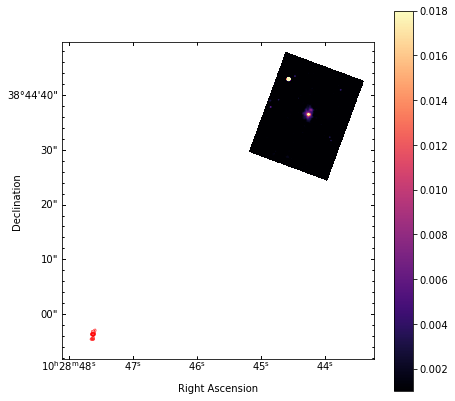

In [64]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection=wcs_out)

registered_336 = gaussian_filter(registered_336, 1.5)
im = ax.imshow(registered_336, vmin=0.001, vmax=0.018, origin='lower', cmap= 'magma', interpolation='none') 

l = [0.01,0.019,0.028,0.037,0.055,0.073,0.091,0.2]
ax.contour(registered_5ghz, transform=ax.get_transform(wcs_out),levels=l, colors='red', linewidths=0.6)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right Ascension',minpad=1.6)
lat.set_axislabel('Declination',minpad=-1.0)
ax.tick_params(axis='both',direction='in') 
lon.set_ticks(number=5)
lat.set_ticks(number=7)
lat.display_minor_ticks(True)

fig.colorbar(im, ax=ax)

In [104]:
#      ****************** ONLY the HST image needs regridding/alignment  
#                            NOT the radio image (aligned North-up by default) ******************

In [2]:
f = get_pkg_data_filename('/Users/orion/phd_research/hst_data/cropped_drc/1025+390_f336w_shifted.fits')
f_r = get_pkg_data_filename('/Users/orion/phd_research/radio/1025+390_5GHz_cropped.fits')

hdu_336 = fits.open(f)
hdu_5ghz = fits.open(f_r)

In [3]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdu_336)

In [4]:
registered_336, registered_336_footprint = reproject_interp(hdu_336, wcs_out, shape_out)

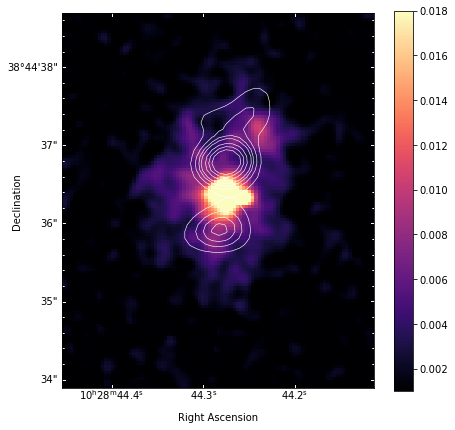

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection=wcs_out)

registered_336 = gaussian_filter(registered_336, 1.5)
im = ax.imshow(registered_336, vmin=0.001, vmax=0.018, origin='lower', cmap= 'magma', interpolation='none') 

l = [0.01,0.019,0.028,0.037,0.055,0.073,0.091,0.2]
ax.contour(hdu_5ghz[0].data, transform=ax.get_transform(WCS(hdu_5ghz[0].header, naxis=2)),levels=l, colors='white', linewidths=0.6)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right Ascension',minpad=1.6)
lat.set_axislabel('Declination',minpad=-1.0)
ax.set_xlim(270, 370)
ax.set_ylim(290, 410)
ax.tick_params(axis='both',direction='in',color='white',labelcolor='black')
lon.set_ticks(number=5)
lat.set_ticks(number=7)
lat.display_minor_ticks(True)

fig.colorbar(im, ax=ax)
#plt.savefig('1025+390_new.png',facecolor='w', dpi=300)